preprocessing mempunyai 2 tahap: validasi data dan problem solving.
tujuannya: validasi data untuk mendeteksi bagian mana yg perlu perbaikan di tahap problem solving

In [2]:
# kebutuhan preprocessing

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r"D:\Dhika Ramadhan Saputra\Data Analist\Full Project\Analisis Pasar untuk Industri Ritek di Indonesia\data\raw_dataset(dari_database).csv", sep=";")
df.head()

,transaction_id,Date,Product_Name,Category,Units_Sold,Unit_Price,Revenue,Store_Location,Payment_Method,Province,Unit_Cost
0,JATNG_PURJO_00001,2023-01-01,Nabati Wafer,Snacks,7,5.0,35.0,Purworejo,Card,Jawa Tengah,4.0
1,JABAR_SUMNG_00002,2023-01-01,Sedaap Soto,Instant Noodles,16,4.0,61.0,Sumedang,Cash,Jawa Barat,3.0
2,JABAR_BANAT_00003,2023-01-01,Sari Roti Tawar,Snacks,2,12.0,24.0,Bandung Barat,Cash,Jawa Barat,11.0
3,JABAR_SUMNG_00004,2023-01-01,Pantene Shampoo 1L,Personal Care,6,45.0,270.0,Sumedang,Cash,Jawa Barat,34.0
4,JATIM_MADUN_00005,2023-01-01,Tolako Minuman Herbal,Health,16,9.0,136.0,Madiun,Cash,Jawa Timur,6.0


Tidak ditemukan masalah pada data duplikat, struktur data, distribusi, dan missing/null values. Jadi problem solving tidak diperlukan

## Validasi data

Hal-hal yang divalidasi: data duplikat, struktur dataset, missing/null values, distribusi data.
tujuan = intinya ngelist data yg ga bener

### Data duplikat

In [3]:
# Menghitung jumlah data duplikat 100%
len(df[df.duplicated()])

0

In [4]:
# melihat data duplikatnya
df[df.duplicated()]

,transaction_id,Date,Product_Name,Category,Units_Sold,Unit_Price,Revenue,Store_Location,Payment_Method,Province,Unit_Cost


### Struktur dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   transaction_id  200000 non-null  object 
 1   Date            200000 non-null  object 
 2   Product_Name    200000 non-null  object 
 3   Category        200000 non-null  object 
 4   Units_Sold      200000 non-null  int64  
 5   Unit_Price      200000 non-null  float64
 6   Revenue         200000 non-null  float64
 7   Store_Location  200000 non-null  object 
 8   Payment_Method  200000 non-null  object 
 9   Province        200000 non-null  object 
 10  Unit_Cost       200000 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 16.8+ MB


### Distribusi data

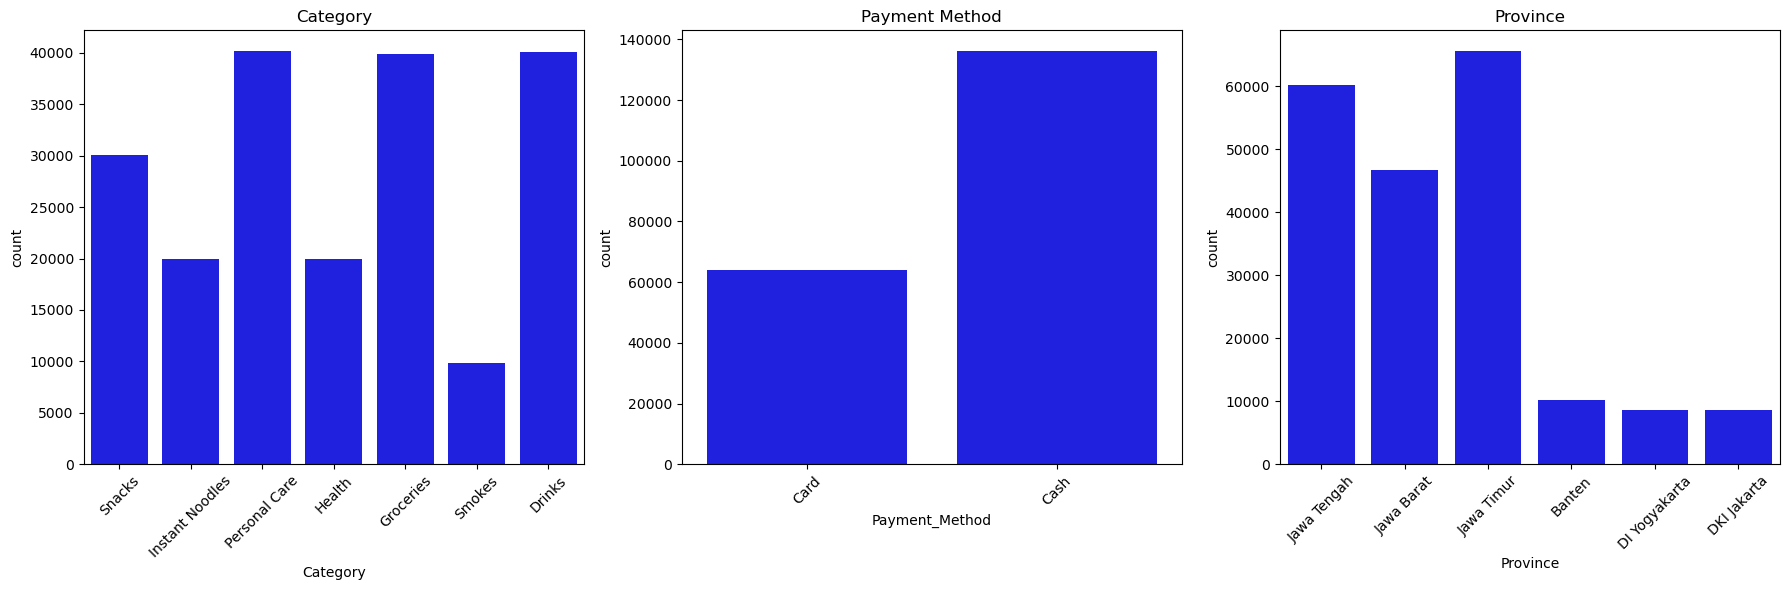

In [6]:
# Kategorial
# 1 baris dan 3 kolom
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

ax = axes.flatten()

# Plot 1: Category
sns.countplot(data=df, x='Category', ax=ax[0], color='blue')
ax[0].set_title('Category')
ax[0].tick_params(axis='x', rotation=45)

# Plot 2: Payment_Method
sns.countplot(data=df, x='Payment_Method', ax=ax[1], color='blue')
ax[1].set_title('Payment Method')
ax[1].tick_params(axis='x', rotation=45)

# Plot 3: Province
sns.countplot(data=df, x='Province', ax=ax[2], color='blue')
ax[2].set_title('Province')
ax[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [ ]:
# ngecek numerik - fungsinya biar tau ada yg mines/0 apa ga
print(df[['Revenue', 'Units_Sold', 'Unit_Price', 'Unit_Cost']].describe())

--- Basic Statistics ---
             Revenue     Units_Sold     Unit_Price      Unit_Cost
count  200000.000000  200000.000000  200000.000000  200000.000000
mean      202.934350      14.916030      22.013385      18.599300
std       217.837827      12.148888      22.095388      19.427567
min         1.000000       1.000000       4.000000       3.000000
25%        49.000000       6.000000       7.000000       5.000000
50%       122.000000      12.000000      15.000000      11.000000
75%       273.000000      18.000000      33.000000      29.000000
max       990.000000      60.000000      90.000000      79.000000


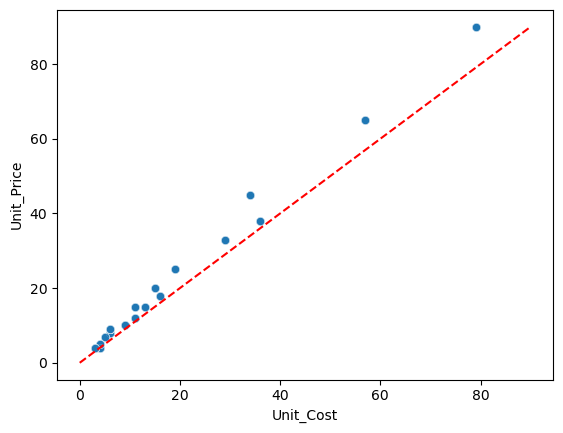

In [ ]:
# liat korelasi harga sama modal. siapa tau ada outlier
sns.scatterplot(data=df, x=df['Unit_Cost'], y=df['Unit_Price'], alpha=0.6)
max_val = max(df['Unit_Cost'].max(), df['Unit_Price'].max())
plt.plot([0, max_val], [0, max_val], color='red', linestyle='--', label='Break-even (Price = Cost)')

### Null/missing values

In [41]:
df.isna().sum()

transaction_id    0
Date              0
Product_Name      0
Category          0
Units_Sold        0
Unit_Price        0
Revenue           0
Store_Location    0
Payment_Method    0
Province          0
Unit_Cost         0
dtype: int64

In [43]:
# df.to_csv(r'D:\Dhika Ramadhan Saputra\Data Analist\Full Project\Analisis Pasar untuk Industri Ritek di Indonesia\data\clean_dataset.csv', index=False)